In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
img = cv2.imread('./Test/brad.jpg')
img.shape

(474, 474, 3)

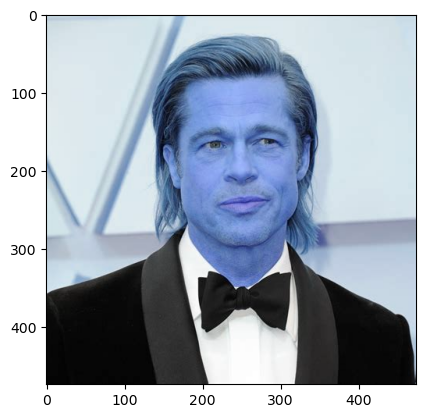

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(474, 474)

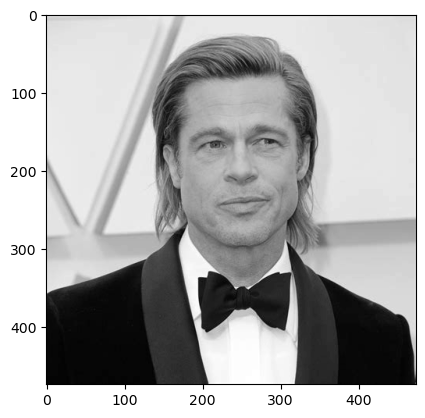

In [5]:
plt.imshow(gray, cmap="gray")

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

face_cascade2 = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalcatface.xml')
face_cascade3= cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalcatface_extended.xml')
face_cascade4 = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_alt.xml')
face_cascade5 = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_alt2.xml')
face_cascade6 = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_alt_tree.xml')



eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')



faces = face_cascade.detectMultiScale(gray,1.3,5)
print(faces)

# faces = face_cascade4.detectMultiScale(gray,1.3,5)
# print(faces)
# faces = face_cascade5.detectMultiScale(gray,1.3,5)
# print(faces)



[[150  89 198 198]]


In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(150, 89, 198, 198)

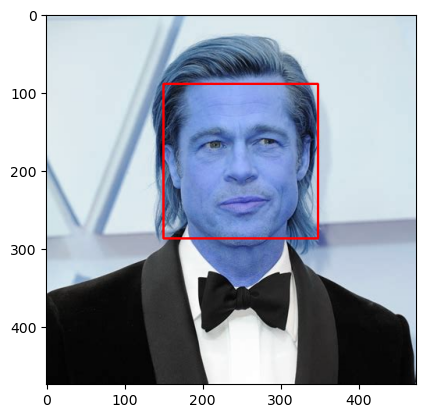

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

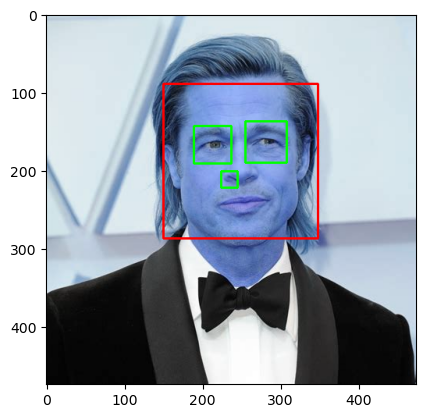

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

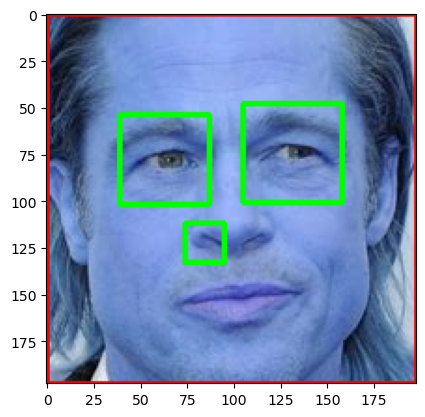

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
cropped_img = np.array(roi_color)
cropped_img.shape

(198, 198, 3)

<h3 style='color:purple'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

In [12]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

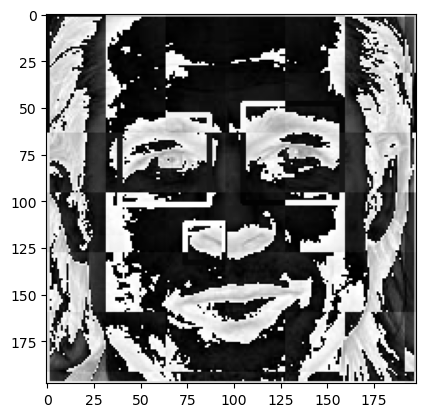

In [13]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

<h3 style='color:purple'>(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region</h3>

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

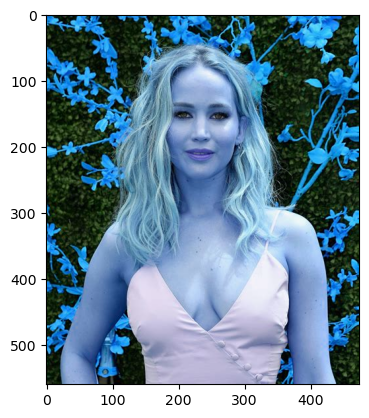

In [15]:
original_image = cv2.imread('./Test/jen.jpg')
plt.imshow(original_image)

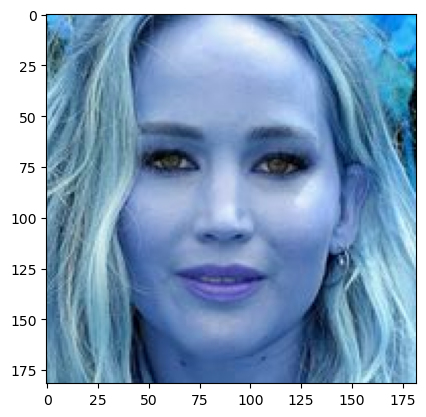

In [16]:
cropped_image = get_cropped_image_if_2_eyes('./Test/jen.jpg')
plt.imshow(cropped_image)

In [22]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs

['./dataset/Angelina Jolie',
 './dataset/Brad Pitt',
 './dataset/Denzel Washington',
 './dataset/Hugh Jackman',
 './dataset/Jennifer Lawrence',
 './dataset/Johnny Depp',
 './dataset/Kate Winslet',
 './dataset/Leonardo DiCaprio',
 './dataset/Megan Fox',
 './dataset/Natalie Portman',
 './dataset/Nicole Kidman',
 './dataset/Robert Downey Jr',
 './dataset/Sandra Bullock',
 './dataset/Scarlett Johansson',
 './dataset/Tom Cruise',
 './dataset/Tom Hanks',
 './dataset/Will Smith']

In [24]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        if entry.path!="cropped":
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

Generating cropped images in folder:  ./dataset/cropped/Angelina Jolie
Generating cropped images in folder:  ./dataset/cropped/Brad Pitt
Generating cropped images in folder:  ./dataset/cropped/Denzel Washington
Generating cropped images in folder:  ./dataset/cropped/Hugh Jackman
Generating cropped images in folder:  ./dataset/cropped/Jennifer Lawrence
Generating cropped images in folder:  ./dataset/cropped/Johnny Depp
Generating cropped images in folder:  ./dataset/cropped/Kate Winslet
Generating cropped images in folder:  ./dataset/cropped/Leonardo DiCaprio
Generating cropped images in folder:  ./dataset/cropped/Megan Fox
Generating cropped images in folder:  ./dataset/cropped/Natalie Portman
Generating cropped images in folder:  ./dataset/cropped/Nicole Kidman
Generating cropped images in folder:  ./dataset/cropped/Robert Downey Jr
Generating cropped images in folder:  ./dataset/cropped/Sandra Bullock
Generating cropped images in folder:  ./dataset/cropped/Scarlett Johansson
Generati

In [27]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Angelina Jolie': ['./dataset/cropped/Angelina Jolie\\Angelina Jolie1.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie10.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie11.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie12.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie13.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie14.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie15.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie16.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie17.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie18.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie19.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie2.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie20.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie21.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie22.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie23.png',
  './dataset/cropped/Ang

In [30]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
#     celebrity_name = celebrity_name.replace(" ", "_") 
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Angelina Jolie': 0,
 'Brad Pitt': 1,
 'Denzel Washington': 2,
 'Hugh Jackman': 3,
 'Jennifer Lawrence': 4,
 'Johnny Depp': 5,
 'Kate Winslet': 6,
 'Leonardo DiCaprio': 7,
 'Megan Fox': 8,
 'Natalie Portman': 9,
 'Nicole Kidman': 10,
 'Robert Downey Jr': 11,
 'Sandra Bullock': 12,
 'Scarlett Johansson': 13,
 'Tom Cruise': 14,
 'Tom Hanks': 15,
 'Will Smith': 16}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [31]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [43]:
len(X[0])

4096

In [44]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1375, 4096)

### Data cleaning process is done. Now we are ready to train our model

In [45]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(random_state=1, max_iter=300))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)




0.6133720930232558

In [47]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64        31
           1       0.24      0.50      0.32        10
           2       0.58      0.85      0.69        13
           3       0.55      0.61      0.58        18
           4       0.52      0.61      0.56        23
           5       0.50      0.33      0.40        18
           6       0.75      0.38      0.50        24
           7       0.75      0.64      0.69        28
           8       0.64      0.74      0.68        19
           9       0.44      0.67      0.53        18
          10       0.67      0.70      0.68        20
          11       0.38      0.28      0.32        18
          12       0.58      0.69      0.63        16
          13       0.74      0.85      0.79        40
          14       0.82      0.60      0.69        15
          15       0.82      0.53      0.64        17
          16       0.79      0.69      0.73        16

    accuracy              

In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [50]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.608123,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.287102,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.611045,{'logisticregression__C': 1}


In [51]:
best_clf = best_estimators['svm']

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[17,  0,  0,  0,  0,  1,  1,  0,  6,  3,  1,  0,  0,  2,  0,  0,
         0],
       [ 0,  5,  1,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,
         0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0],
       [ 1,  1,  0, 12,  0,  0,  0,  2,  0,  0,  1,  0,  0,  1,  0,  0,
         0],
       [ 1,  0,  0,  0, 16,  0,  0,  0,  0,  1,  1,  0,  0,  3,  1,  0,
         0],
       [ 0,  1,  0,  1,  1, 11,  0,  0,  0,  1,  0,  3,  0,  0,  0,  0,
         0],
       [ 2,  0,  0,  0,  4,  0, 10,  0,  1,  2,  4,  0,  0,  1,  0,  0,
         0],
       [ 1,  1,  1,  0,  0,  2,  0, 21,  0,  0,  0,  0,  0,  0,  1,  1,
         0],
       [ 6,  0,  0,  0,  0,  1,  0,  0, 11,  0,  0,  0,  1,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 13,  0,  0,  1,  2,  0,  0,
         0],
       [ 0,  0,  0,  0,  5,  0,  1,  0,  0,  2,  8,  0,  1,  3,  0,  0,
         0],
       [ 1,  3,  0,  4,  0,  2,  0,  1,  0,  1,  0,  5,  0,  0,  

Text(95.72222222222221, 0.5, 'Truth')

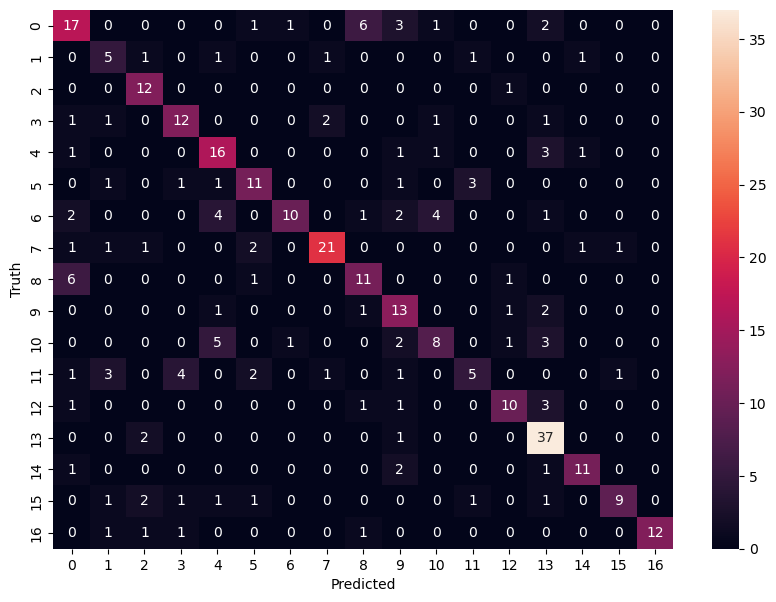

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
class_dict


{'Angelina Jolie': 0,
 'Brad Pitt': 1,
 'Denzel Washington': 2,
 'Hugh Jackman': 3,
 'Jennifer Lawrence': 4,
 'Johnny Depp': 5,
 'Kate Winslet': 6,
 'Leonardo DiCaprio': 7,
 'Megan Fox': 8,
 'Natalie Portman': 9,
 'Nicole Kidman': 10,
 'Robert Downey Jr': 11,
 'Sandra Bullock': 12,
 'Scarlett Johansson': 13,
 'Tom Cruise': 14,
 'Tom Hanks': 15,
 'Will Smith': 16}

In [55]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [56]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))